# Identificar fronteras no lineales

In [1]:
from sklearn.datasets import make_circles, make_blobs

In [2]:
X, Y = make_circles(100, factor= .1, noise= .1)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [4]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

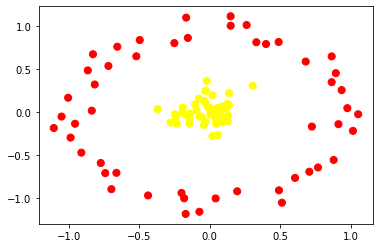

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

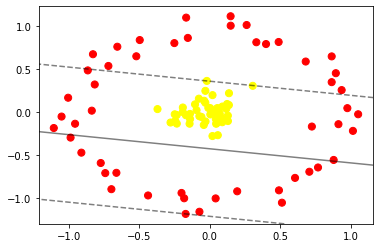

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [7]:
r = np.exp(-(X**2).sum(1))

In [8]:
r

array([0.3719872 , 0.99232979, 0.93406314, 0.36640924, 0.38516877,
       0.96003173, 0.93249801, 0.3097461 , 0.39378929, 0.31785221,
       0.97574846, 0.40268353, 0.24035084, 0.8740613 , 0.93936469,
       0.27973712, 0.99369506, 0.92672178, 0.99523687, 0.99904054,
       0.324058  , 0.91232531, 0.39870956, 0.99749064, 0.99857182,
       0.36791284, 0.96891777, 0.36528979, 0.38808365, 0.34999071,
       0.2761521 , 0.48965827, 0.96080316, 0.39289072, 0.35343262,
       0.99047561, 0.99366618, 0.36240963, 0.28798351, 0.41853151,
       0.38996008, 0.93815509, 0.9824305 , 0.93049578, 0.99717987,
       0.99483787, 0.99253408, 0.8698589 , 0.34071432, 0.45307115,
       0.25516862, 0.46032764, 0.41443327, 0.98034082, 0.57639339,
       0.38432011, 0.98263214, 0.49555842, 0.99271661, 0.99943099,
       0.26116785, 0.96266899, 0.98025203, 0.34558877, 0.35621911,
       0.34973649, 0.97697057, 0.994793  , 0.97054943, 0.42689339,
       0.94549952, 0.4435651 , 0.28392335, 0.98793106, 0.38820

In [9]:
from mpl_toolkits import mplot3d

In [10]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1],r, c=Y, s= 50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")
    

In [11]:
from ipywidgets import interact, fixed

In [12]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150, 180], 
         X = fixed(X), Y = fixed(Y), r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-8.66080413e-01,  4.88672224e-01],
       [ 4.24928886e-02, -7.67732379e-02],
       [ 1.35716289e-01,  2.23141953e-01],
       [ 4.10501613e-02, -1.00115898e+00],
       [ 9.75512194e-01,  4.94937888e-02],
       [ 1.89618549e-02,  2.01070621e-01],
       [-2.45137055e-01, -9.89751534e-02],
       [ 8.64438783e-01,  6.51726889e-01],
       [-9.56274015e-01, -1.32209415e-01],
       [-8.29362689e-01,  6.76997988e-01],
       [ 1.22461285e-01,  9.77429752e-02],
       [ 4.88041802e-01,  8.19401920e-01],
       [-1.71825821e-01, -1.18158008e+00],
       [-2.14580692e-02,  3.66257177e-01],
       [-2.49131265e-01, -2.20250667e-02],
       [ 1.47255541e-01,  1.11902671e+00],
       [-5.95420342e-02, -5.27223124e-02],
       [ 1.84161595e-02, -2.75250309e-01],
       [ 6.00607726e-02, -3.41644714e-02],
       [ 3.09803181e-02,  3.72335909e-04],
       [-4.38434481e-01, -9.66751246e-01],
       [-2.79050353e-01, -1.17853952e-01],
       

In [13]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0)

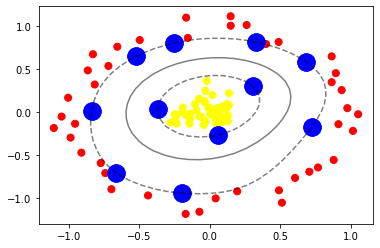

In [14]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")

# Ajustar los parámetros del SVM

In [15]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2 )

AttributeError: module 'matplotlib.pyplot' has no attribute 'SVC'

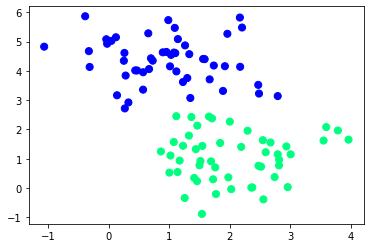

In [24]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="winter")
model = SVC(kernel="linear", C= 1E6)
model.fit(X,Y)
plt.SVC(model)

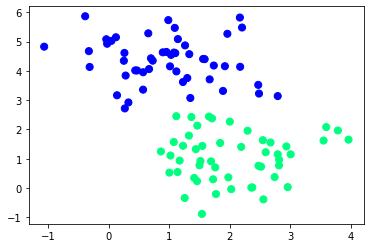

In [17]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="winter")

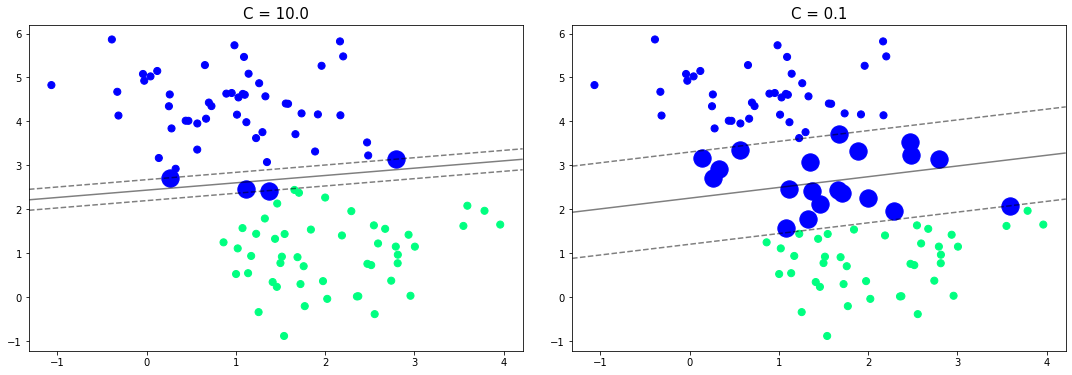

In [23]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="winter")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size=15)